## Problem Statements:Predict the Cocacola sales

## IMPORT Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import data set

In [2]:
cola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
# Checking  the summary of the whole dataset
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
# Calculating the statistical datas from the dataframe to basic idea
cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


## duplicate

In [5]:
cola[cola.duplicated()]

,Quarter,Sales


## Visualization

<AxesSubplot:ylabel='Sales'>

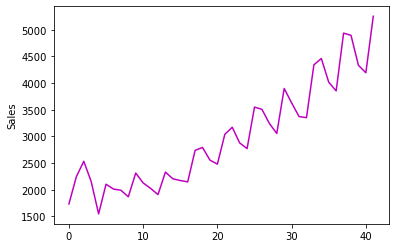

In [6]:
# Data visualization to get a basic knowledge about the forecasting
sns.lineplot(data=cola["Sales"],color="m")

<AxesSubplot:ylabel='Density'>

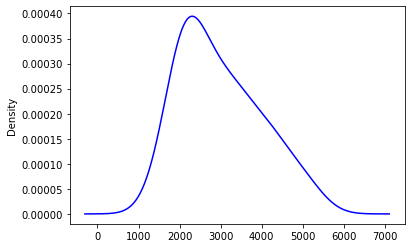

In [7]:
cola["Sales"].plot(kind="kde",color="blue")

<AxesSubplot:ylabel='Frequency'>

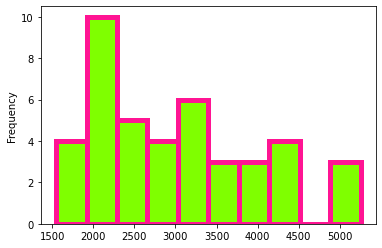

In [8]:
cola["Sales"].plot(kind="hist",color="chartreuse",linewidth=5,edgecolor="deeppink")

In [9]:
param=pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True,squeeze=True)

## Lag_plot

In [10]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

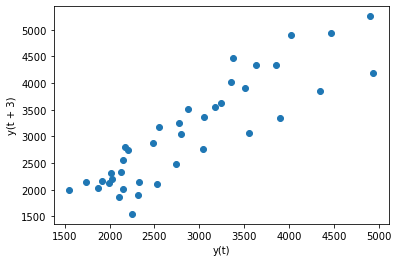

In [11]:
lag_plot(param,lag=3)

In [12]:
# Seperating and Aggregating the Quaters and years present in the "Quater" column of the original data, in order to do one holt encoding.
cola["Quarters"]=0
cola["Year"]=0
for i in range(42):
    p=cola["Quarter"][i]
    cola["Quarters"][i]=p[0:2]
    cola["Year"][i]=p[3:5]
cola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [13]:
Q_dummies = pd.DataFrame(pd.get_dummies(cola["Quarters"]))
Q_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [14]:
# concatinating the new dummy variable with the original dataset
coca_cola=pd.concat([cola,Q_dummies],axis=1)
coca_cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [15]:
# Creating a column for time in the dataset
coca_cola["Time"]=range(1,43)

In [16]:
# Creating a squared time column for using in the quardratic model
coca_cola["Time_sqr"]=coca_cola["Time"]*coca_cola["Time"]

In [17]:
# Creating a log transformation for the dependent variable for exponential model.
coca_cola["log_sales"]=np.log(coca_cola["Sales"])

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

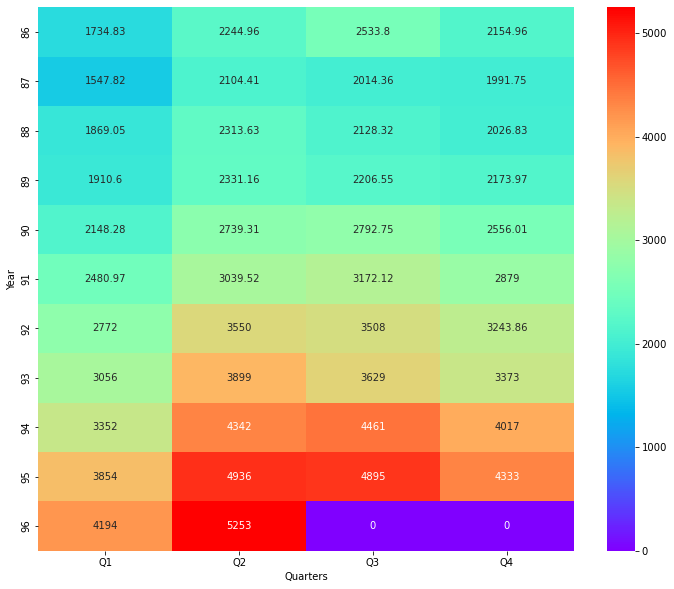

In [18]:
# Heatmap- To show the mean sales. In each Quarter of the year.
plt.figure(figsize=(12,10))
plot_month_y=pd.pivot_table(data=coca_cola,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt = "g", cmap="rainbow")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

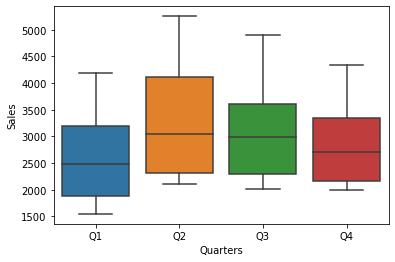

In [19]:
# Box plot - To check the sales of all the four quarters
sns.boxplot(x="Quarters",y="Sales",data=coca_cola)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

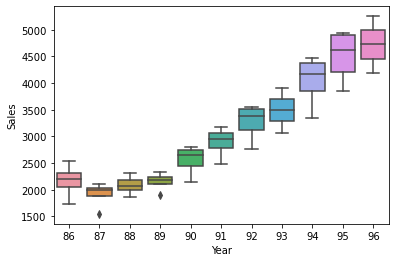

In [20]:
# box plot : To visualize the sales of coca_cola throughout the years with 4 components - Trend,cyclic,seasonality and irregularity component.
sns.boxplot(x="Year",y="Sales",data=coca_cola)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

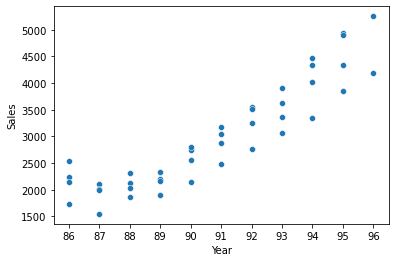

In [21]:
# Scatter plot: To understand the past sales growth
sns.scatterplot(x="Year",y="Sales",data=coca_cola)

## Model Driven methods for forecasting

In [22]:
import statsmodels.formula.api as smf

In [23]:
# spliting the dataset into the train and test data
train=coca_cola.head(30)
test=coca_cola.tail(12)

## Developing models

#### 1) Linear model

#### 2) Exponential model

#### 3) Quardratic model

#### 4) Additive seasonal model

#### 5) Additive seasonality quardratic model

#### 6) Multiplicative seasonality model

#### 7) Multiplicative additive seasonality model

In [24]:
# Linear model
linear_model=smf.ols("Sales~Time",data=coca_cola).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test["Time"])))
rmse_linear=np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_linear))**2))
rmse_linear

449.799622612296

In [25]:
# Exponential model
Exp = smf.ols("log_sales~Time",data=coca_cola).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(test["Time"])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

417.560828374984

In [26]:
# Quardratic model
Quad = smf.ols("Sales~Time+Time_sqr",data=coca_cola).fit()
pred_Quad = pd.Series(Quad.predict(test[["Time","Time_sqr"]]))
rmse_quad = np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_Quad))**2))
rmse_quad

394.7556159270111

In [27]:
# Additive seasonality model
add_sea= smf.ols("Sales~Q1+Q2+Q3+Q4",data=coca_cola).fit()
pred_add_sea=pd.Series(add_sea.predict(test[["Q1","Q2","Q3","Q4"]]))
rmse_add_sea=np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_add_sea))**2))
rmse_add_sea

1305.6638874921075

In [28]:
# Additive Seasonality Quardratic model
add_sea_quard = smf.ols("Sales~Time+Time_sqr+Q1+Q2+Q3+Q4",data=coca_cola).fit()
pred_add_sea_quard=pd.Series(add_sea_quard.predict(test[["Time","Time_sqr","Q1","Q2","Q3","Q4"]]))
rmse_add_sea_quard=np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_add_sea_quard))**2))
rmse_add_sea_quard

170.42727210326416

In [29]:
#Multiplicative seasonality model
mul_sea = smf.ols("log_sales~Q1+Q2+Q3+Q4",data=coca_cola).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test))
rmse_mul_sea=np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1435.50113100089

In [30]:
# Multiplicative additive seasonality model
mul_add_sea= smf.ols("log_sales~Time+Q1+Q2+Q3+Q4",data=coca_cola).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(test["Sales"])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

172.15056883930205

### Comparison between the all models within a table

In [31]:
d={"Model":["Rmse_linear","Rmse_Exp","Rmse_Quard","Rmse_Add_Sea","Rmse_Add_Sea_Quard","Rmse_Mul_Sea","Rmse_Mul_Add_Sea"],
   "RMSE":[rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quard,rmse_mul_sea,rmse_mul_add_sea]}
table=pd.DataFrame(d)
table

,Model,RMSE
0,Rmse_linear,449.799623
1,Rmse_Exp,417.560828
2,Rmse_Quard,394.755616
3,Rmse_Add_Sea,1305.663887
4,Rmse_Add_Sea_Quard,170.427272
5,Rmse_Mul_Sea,1435.501131
6,Rmse_Mul_Add_Sea,172.150569


## Model Prediction - with additive seasonality quadratic

In [32]:
final_model=smf.ols("Sales~Time+Time_sqr+Q1+Q2+Q3+Q4",data=coca_cola).fit()
pred_final=pd.Series(final_model.predict(coca_cola))

In [33]:
coca_cola["Predicted"]=pred_final
coca_cola

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,Time,Time_sqr,log_sales,Predicted
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1626.592727
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,2268.402339
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,2189.685821
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1867.242917
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1658.311143
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791,2314.185178
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058,2249.533083
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767,1941.154603
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186,1746.287252
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574,2416.225709


## Inference:

### From all the models listed above, we are getting the least RMSE value in Additive Seasonality quadratic model of 170.42, and thus we build a model to predict using the same model on the whole data.

## ======================================================================================